In [44]:
#Check python's version
from platform import python_version
print("The current python's version is: ",python_version())

#Check the path of the current Python interpreter used to execute the script.
import sys
print("\nThe path of the current Python interpreter (should be a virtual env!):\n",sys.executable)

The current python's version is:  3.9.19

The path of the current Python interpreter (should be a virtual env!):
 /Users/laura/Progetti_Python/000_Progetti_in_corso/ML_SentimentAnalysisX/.v_env_mlX/bin/python


<h1 style="background-color:#eaeaea;font-family:Calibri;color:#fe0b50;font-size:200%;text-align:center;border-radius: 50px;padding: 10px">Machine Learning Sentiment Analysis X (Twitter)</h1>

Machine Learning Sentiment Analysis X (Twitter)

## The Project 

The project focuses on analysing the sentiment of tweets, using a machine learning technique. 
The objective is to determine the sentiment expressed within tweets using the Naive Bayes Classifier algorithm.
This algorithm relies on Bayes' theorem and is termed 'naive' based on its assumption of conditional independence among features. The Naive Bayes Classifier is particularly effective with small datasets and weakly related features.
(The sentiment analysis is most commonly used on short texts such as reviews, tweets or messages; it is not suitable for analysing longer texts such as books.)

*Thanks to: https://medium.com/@oliwills8373/guide-to-sentiment-analysis-with-machine-learning-step-by-step-explanation-with-code-examples-420156fec010

<h1 style="background-color:#eaeaea;font-family:Calibri;color:orange;font-size:250%;text-align:center;border-radius:50px;padding:10px 30px;">Index</h1>

INDEX

- [Libraries & Utilities](#0)

- [Data Preprocessing](#1)
    - [Importing Data](#1-1)
    - [Tokenisation and text cleaning](#1-2)
    - [Feature Extraction](#1-3)
- [The Dataset](#2)
    - [Cleansing the tweets](#2-1)
    - [Extracts the word frequency features](#2-2)
    - [Splitting the dataset](#2-3)
- [The Model](#3)
    - [Training the model](#3-1)
    - [Test the model and calculates the accuracy](#3-2)
    - [Test the model on new data](#3-3)


<a id = '0'></a>
<h1 style="background-color:#eaeaea;font-family:Calibri;color:blue;font-size:250%;text-align:center;border-radius:50px;padding:10px 30px;">Libraries</h1>

<a id = '0'></a>
<h1 style="font-size: 150%;">Libraries & Utilities</h1>

In [45]:
#Install all the libraries the project needs
#pip install -r requirements.txt 

import nltk
import re
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
from nltk.corpus import twitter_samples
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords') #collection of stopwords
from sklearn.model_selection import train_test_split
from nltk.classify import NaiveBayesClassifier

import warnings #only for os
warnings.filterwarnings("ignore") #only for os

[nltk_data] Downloading package stopwords to /Users/laura/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Libraries:
1. ***nltk***
-> Used for natural language processing
2. ***re***
-> Used to regular expression
3. ***pandas***
-> Used to parse data; among its main functionalities is the creation of the data structure called DataFrame.
4. ***openpyxl***
-> Used to open the data structure
5. ***matplotlib***
-> Used to plot graphs
6. ***twitter_samples***
-> Used to import a sample of tweets for natural language analysis
7. ***TweetTokenizer***
-> Used to tokenize tweets into words
8. ***PorterStemmer***
-> Used to stem words to their roots form
9. ***stopwords***
-> Used to remove stopwords from tweets - collection of common words that are often removed during text preprocessing
10. ***train_test_split***
-> Used to split the dataset into train and test sets
11. ***NaiveBayesClassifier***
-> Used to train a Naive Bayes classifier for text classification
12. ***warnings***
-> Used to handle warnings during code execution.

<a id = '1'></a>
<h1 style="background-color:#eaeaea;font-family:Calibri;color:green;font-size:250%;text-align:center;border-radius: 50px;padding:10px 30px">Data Preprocessing</h1>

<a id = '1-1'></a>
<h1 style="font-size: 150%;">Importing Data</h1>

In [46]:
#Loading data
nltk.download('twitter_samples') #collection of tweets 

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/laura/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [47]:
#View list of files in twitter_samples
file_list = twitter_samples.fileids()

print("List of files in twitter_samples:")
for file_id in file_list:
    print(file_id)

List of files in twitter_samples:
negative_tweets.json
positive_tweets.json
tweets.20150430-223406.json


In [48]:
#Variables creation
pos_tweets = twitter_samples.strings('positive_tweets.json')
neg_tweets = twitter_samples.strings('negative_tweets.json')

#Examples
for tweet in pos_tweets[:3]:
    print("Examples of positive tweets:")
    print(tweet)
    print() 

print("- * - * - *")

for tweet in neg_tweets[:3]:
    print("\nExamples of negative tweets:")
    print(tweet)
    print() 

Examples of positive tweets:
#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)

Examples of positive tweets:
@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!

Examples of positive tweets:
@DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!

- * - * - *

Examples of negative tweets:
hopeless for tmr :(


Examples of negative tweets:
Everything in the kids section of IKEA is so cute. Shame I'm nearly 19 in 2 months :(


Examples of negative tweets:
@Hegelbon That heart sliding into the waste basket. :(



In [49]:
#Create a new df for take a look to the data
pos_tweets_df = pd.DataFrame(pos_tweets, columns=['Tweet'])
neg_tweets_df = pd.DataFrame(neg_tweets, columns=['Tweet'])

#Export to Excel
pos_tweets_df.to_excel('pos_tweets.xlsx', index=False)
neg_tweets_df.to_excel('neg_tweets.xlsx', index=False)

<a id = '1-2'></a>
<h1 style="font-size: 150%;">Tokenisation and text cleaning</h1>

In [50]:
#Tokenization = breaks down a text into individual words or tokens
tokenizer = TweetTokenizer(preserve_case = False, strip_handles = True, reduce_len = True)

In [51]:
#Cleansing text from useless characters and removes them from the original text

#obtains a list of stopwords in English
stop_words = stopwords.words('english')

#creates an instance of PorterStemmer, which enables text stemming using Porter's algorithm.
#stemming words = reducing them to their root or basic form, removing any suffixes or prefixes
stemmer = PorterStemmer()

def clean_tweet(tweet):
    #removes all dollar signs followed by a sequence of alphanumeric characters from the tweet
    tweet = re.sub(r'\$\w*', '', tweet)  
    #revomes all URL links in the tweet
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)  
    #removes all '#' in the tweet
    tweet = re.sub(r'#', '', tweet)  
    #tokenize tweet = divide text into individual words or tokens
    tweet_tokens = tokenizer.tokenize(tweet)
    tweets_clean = []
    for word in tweet_tokens:
        #checks if the word is not a stopword and if it only consists of alphabetic characters.
        if (word not in stop_words and word.isalpha()):
            #applies stemming to each tokenized word in the tweet
            stem_word = stemmer.stem(word)
            tweets_clean.append(stem_word)
    #returns the list of cleaned words 
    return tweets_clean

<a id = '1-3'></a>
<h1 style="font-size: 150%;">Feature Extraction</h1>

In [52]:
#Feature Extraction

#this def calculates the frequency of each word in a list of words and returns a dictionary containing:
#the words as keys and their frequencies as values.
def get_word_frequency(words):
    word_frequency = {}
    for word in words:
        if word in word_frequency:
            word_frequency[word] += 1
        else:
            word_frequency[word] = 1
    return word_frequency

<a id = '2'></a>
<h1 style="background-color:#eaeaea;font-family:Calibri;color:grey;font-size:250%;text-align:center;border-radius: 50px;padding:10px 30px">The dataset</h1>

<a id = '2-1'></a>
<h1 style="font-size: 150%;">Cleansing the tweets</h1>

In [53]:
#pos_cln_tokens = [clean_tweet(tweet) for tweet in pos_tweets]
pos_cln_tokens = []
for tweet in pos_tweets:
    pos_cln_tokens.append(clean_tweet(tweet))

#neg_cln_tokens = [clean_tweet(tweet) for tweet in neg_tweets]    
neg_cln_tokens = []
for tweet in neg_tweets:
    neg_cln_tokens.append(clean_tweet(tweet))

<a id = '2-2'></a>
<h1 style="font-size: 150%;">Extracts the word frequency features</h1>

In [54]:
#pos_feat = [(get_word_frequency(tokens), 'Positive') for tokens in pos_cln_tokens]
pos_feat = []
for tokens in pos_cln_tokens:
    pos_feat.append((get_word_frequency(tokens), 'Positive'))

#neg_feat = [(get_word_frequency(tokens), 'Negative') for tokens in neg_cln_tokens] 
neg_feat = []
for tokens in neg_cln_tokens:
    neg_feat.append((get_word_frequency(tokens), 'Negative'))

all_feat = pos_feat + neg_feat

In [55]:
#Verification of data balance

#Label's count 
num_pos = sum(1 for _, label in all_feat if label == 'Positive')
num_neg = sum(1 for _, label in all_feat if label == 'Negative')

#View distribution
print('Number of positive examples:', num_pos)
print('Number of negative examples:', num_neg)

#Calculation of proportions
total = len(all_feat)
pos_ratio = round((num_pos / total) * 100)
neg_ratio = round((num_neg / total) * 100)

print('\nPositive ratio:', pos_ratio,'%')
print('Negative ratio:', neg_ratio,'%')

if pos_ratio >= 50:
    print ('\nThe dataset is balanced')
else:
    print ('\nThe dataset is not balanced')

Number of positive examples: 5000
Number of negative examples: 5000

Positive ratio: 50 %
Negative ratio: 50 %

The dataset is balanced


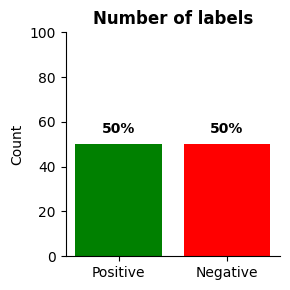

In [87]:
#graphic's labels
categories = ['Positive', 'Negative']
values = [pos_ratio, neg_ratio]
colors = ['green', 'red']

fig, ax = plt.subplots(figsize=(3, 3))
ax.bar(categories, values, color=colors)
ax.set_ylabel('Count')
ax.set_ylim(0, 100)  
ax.set_title('Number of labels', weight = 'bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for i, value in enumerate(values):
    percentage = value / sum(values) * 100
    ax.text(i, value + 5, f'{percentage:.0f}%', ha = 'center', weight = 'bold')
plt.tight_layout()
plt.show()

<a id = '2-3'></a>
<h1 style="font-size: 150%;">Splitting the Dataset</h1>

In [56]:
#Slitting and label examples with train for 80% and test for 20%
train_set, test_set = train_test_split(all_feat, test_size = 0.2, random_state = 42)

<a id = '3'></a>
<h1 style="background-color:#eaeaea;font-family:Calibri;color:violet;font-size:250%;text-align:center;border-radius: 50px;padding:10px 30px">The model</h1>

<a id = '3-1'></a>
<h1 style="font-size: 150%;">Training the model</h1>

In [57]:
#Trains a Naive Bayes classifier using the 'train_set' training set
classifier = NaiveBayesClassifier.train(train_set)

The Naive Bayes classifier is a supervised learning model that is based on the application of Bayes theorem with the 'naive' assumption of conditional independence between features. Features are the frequencies of words in tweets. The model is trained using the train function of NLTK's NaiveBayesClassifier, which takes as input the features extracted from the tweets in the training set and their labels.

<a id = '3-2'></a>
<h1 style="font-size: 150%;">Test the model and calculates the accuracy</h1>

In [88]:
def get_accuracy(test_set, classifier):
    correct = 0
    for (features, label) in test_set:
        prediction = classifier.classify(features)
        if prediction == label:
            correct += 1
    accuracy = float(correct) / len(test_set)
    return accuracy

accuracy = get_accuracy(test_set, classifier)
print('The Accuracy is:', round(accuracy * 100, 2),'%')

The Accuracy is: 74.1 %


The accuracy is calculated by comparing the model's predictions with the actual labels in the test set. For each tweet in the test set, the model predicts the sentiment (positive or negative) and compares this prediction with the actual label of the tweet. Accuracy is calculated as the fraction of correctly classified tweets compared to the total number of tweets in the test set.

<a id = '3-3'></a>
<h1 style="font-size: 150%;">Test the model on new data</h1>

In [59]:
def predict_sentiment(tweet):
    cleaned_tweet = clean_tweet(tweet)
    features = get_word_frequency(cleaned_tweet)
    return classifier.classify(features)

The code defines a predict_sentiment function to classify the sentiment of a new, unlabelled tweet. This function takes as input the text of the tweet, cleans it using the same data cleaning procedure used during the training phase, extracts the features (word frequencies) from the cleaned tweet and uses the trained classifier to predict whether the sentiment of the tweet is positive or negative. 

Test examples:

In [60]:
print('\nTest:')
#Example of right positive result
tweet1 = 'This movie was fantastic!I would like to watch it again'
print('\nThe tweet -> "',tweet1,'" is ', predict_sentiment(tweet1))

#Example of WRONG negative result
tweet2 = "This chicken was nasty!"
print('\nThe tweet -> "',tweet2,'" is', predict_sentiment(tweet2))

#Example of right result
tweet3 = "I'm in love the dogs"
print('\nThe tweet -> "',tweet3,'" is', predict_sentiment(tweet3),'--> WRONG! Should be positive!')

#Example of right result
tweet4 = "I'm a neutral comment"
print('\nThe tweet -> "',tweet4,'" is', predict_sentiment(tweet4))

#Example of WRONG negative result
tweet5 = "This pic is so bad!"
print('\nThe tweet -> "',tweet5,'" is', predict_sentiment(tweet5))


Test:

The tweet -> " This movie was fantastic!I would like to watch it again " is  Positive

The tweet -> " This chicken was nasty! " is Negative

The tweet -> " I'm in love the dogs " is Negative --> WRONG! Should be positive!

The tweet -> " I'm a neutral comment " is Positive

The tweet -> " This pic is so bad! " is Negative


#---------------------------------------------------------------#